# H1B dataset

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
h1b=pd.read_csv("H1B.csv")

### Overview of the data

In [32]:
h1b.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [34]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


### Data Cleansing

In [35]:
h1b.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [36]:
h1b.fillna(0, inplace=True)
h1b.replace({"Y": 1, "N": 0}, inplace=True)
h1b.drop_duplicates(inplace=True)

In [37]:
h1b.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

### Analysis of the Dataset

In [38]:
# Petition distributed by case statuses
print(h1b['CASE_STATUS'].value_counts())

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
0                                                          13
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64


In [39]:
# Top employers filing the petitions
h1b['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      130592
TATA CONSULTANCY SERVICES LIMITED     64726
WIPRO LIMITED                         48117
DELOITTE CONSULTING LLP               36742
IBM INDIA PRIVATE LIMITED             34219
                                      ...  
HARBORTOUCH PAYMENTS, LLC                 1
RESULTLY LLC                              1
AMERICAN POWDER COATING                   1
WEST FLORIDA MEDICAL ASSOCIATES           1
J. LOGAN INTERIORS                        1
Name: EMPLOYER_NAME, Length: 236014, dtype: int64

In [40]:
# Top 15 companies that filed the most visa application
h1b['EMPLOYER_NAME'].value_counts()[0:15]

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
LARSEN & TOUBRO INFOTECH LIMITED                    17457
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
IBM CORPORATION                                     13276
IGATE TECHNOLOGIES INC.                             12564
Name: EMPLOYER_NAME, dtype: int64

In [41]:
# Top employers granting maximum prevailing wages
print(h1b.sort_values(by="PREVAILING_WAGE",ascending=False)[['EMPLOYER_NAME','PREVAILING_WAGE']][0:5].reset_index())

     index                        EMPLOYER_NAME  PREVAILING_WAGE
0  2163248  GUARDIAN HEALTHCARE PROVIDERS, INC.     6.997607e+09
1  2797982                     SCIVANTAGE, INC.     1.007814e+09
2  1673867               DISCOVER PRODUCTS INC.     8.201323e+08
3  1819718                        IDEXCEL, INC.     7.099999e+08
4  2775906                  COMMONHEALTH ACTION     6.579000e+08


In [42]:
# Top 20 states filing highest visa petitions
h1b['WORKSITE'].str.split(',').str[1].value_counts()[0:20]

 CALIFORNIA        559942
 TEXAS             294455
 NEW YORK          291412
 NEW JERSEY        214078
 ILLINOIS          160814
 MASSACHUSETTS     116466
 PENNSYLVANIA      109960
 FLORIDA           105773
 GEORGIA           103168
 WASHINGTON        102801
 VIRGINIA           90028
 MICHIGAN           82964
 NORTH CAROLINA     79672
 OHIO               76575
 MARYLAND           56257
 CONNECTICUT        50253
 MINNESOTA          48686
 ARIZONA            42054
 MISSOURI           34813
 WISCONSIN          32672
Name: WORKSITE, dtype: int64

In [43]:
# Petition distribution by year
h1b['YEAR'].value_counts()

2016.0    647803
2015.0    618727
2014.0    519427
2013.0    442114
2012.0    415607
2011.0    358767
0.0           13
Name: YEAR, dtype: int64

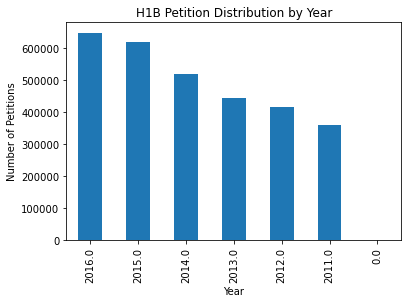

In [44]:
h1b['YEAR'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Petitions')
plt.title('H1B Petition Distribution by Year')

plt.show()

In [45]:
# Number of visa petitions denied
h1b['CASE_STATUS'].value_counts().loc['DENIED']

94346

In [89]:
# Rate of visas denied from last 5 years
hm=h1b.groupby('YEAR')['CASE_STATUS'].count()
hm

YEAR
0.0           13
2011.0    358767
2012.0    415607
2013.0    442114
2014.0    519427
2015.0    618727
2016.0    647803
Name: CASE_STATUS, dtype: int64

YEAR
2012.0    5.075949
2013.0    2.742732
2014.0    2.290216
2015.0    1.765399
2016.0    1.416326
dtype: float64


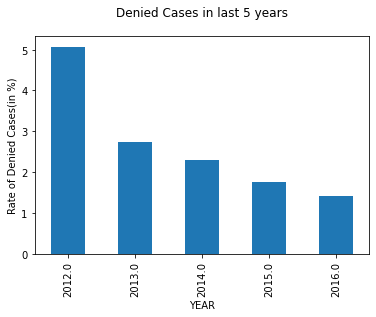

In [117]:
h=h1b[h1b['CASE_STATUS'] == 'DENIED'].groupby('YEAR').size()/hm*100
print (h.iloc[-5:])
h.iloc[-5:].plot(kind="bar")
plt.title("Denied Cases in last 5 years",pad=20)
plt.ylabel("Rate of Denied Cases(in %)")
plt.show()

In [48]:
# Number of visa petitions filed by states
h1b['WORKSITE'].str.split(',').str[1].value_counts()

 CALIFORNIA              559942
 TEXAS                   294455
 NEW YORK                291412
 NEW JERSEY              214078
 ILLINOIS                160814
 MASSACHUSETTS           116466
 PENNSYLVANIA            109960
 FLORIDA                 105773
 GEORGIA                 103168
 WASHINGTON              102801
 VIRGINIA                 90028
 MICHIGAN                 82964
 NORTH CAROLINA           79672
 OHIO                     76575
 MARYLAND                 56257
 CONNECTICUT              50253
 MINNESOTA                48686
 ARIZONA                  42054
 MISSOURI                 34813
 WISCONSIN                32672
 COLORADO                 32038
 INDIANA                  30516
 TENNESSEE                27673
 OREGON                   23790
 DISTRICT OF COLUMBIA     22708
 DELAWARE                 18138
 IOWA                     16743
 ARKANSAS                 14762
 KANSAS                   13782
 UTAH                     13107
 SOUTH CAROLINA           12932
 KENTUCK

In [119]:
# Rate of denial of visa petition by the states
h=h1b['CASE_STATUS']=='DENIED'
h.groupby(h1b['WORKSITE'].str.split(',').str[1]).size()

WORKSITE
 ALABAMA                  10253
 ALASKA                    1396
 ARIZONA                  42054
 ARKANSAS                 14762
 CALIFORNIA              559942
 COLORADO                 32038
 CONNECTICUT              50253
 DELAWARE                 18138
 DISTRICT OF COLUMBIA     22708
 FLORIDA                 105773
 GEORGIA                 103168
 HAWAII                    3752
 IDAHO                     4191
 ILLINOIS                160814
 INDIANA                  30516
 IOWA                     16743
 KANSAS                   13782
 KENTUCKY                 12702
 LOUISIANA                11669
 MAINE                     3918
 MARYLAND                 56257
 MASSACHUSETTS           116466
 MICHIGAN                 82964
 MINNESOTA                48686
 MISSISSIPPI               4270
 MISSOURI                 34813
 MONTANA                    986
 NA                        3604
 NEBRASKA                  9256
 NEVADA                    7448
 NEW HAMPSHIRE             9929

In [50]:
# Top 25 job titles
h1b['JOB_TITLE'].value_counts()[0:25]

PROGRAMMER ANALYST             249038
SOFTWARE ENGINEER              121307
COMPUTER PROGRAMMER             70570
SYSTEMS ANALYST                 61965
SOFTWARE DEVELOPER              42907
BUSINESS ANALYST                39681
COMPUTER SYSTEMS ANALYST        35086
TECHNOLOGY LEAD - US            28350
SENIOR SOFTWARE ENGINEER        27133
TECHNOLOGY ANALYST - US         26055
ASSISTANT PROFESSOR             25265
SENIOR CONSULTANT               24904
CONSULTANT                      23081
PHYSICAL THERAPIST              20207
PROJECT MANAGER                 20172
DATABASE ADMINISTRATOR          16665
ACCOUNTANT                      14048
COMPUTER PROGRAMMER ANALYST     13634
RESEARCH ASSOCIATE              13623
DEVELOPER                       12909
ASSOCIATE                       12502
ANALYST                         11751
LEAD ENGINEER                   11157
COMPUTER SYSTEMS ENGINEER       11090
SENIOR SOFTWARE DEVELOPER       10208
Name: JOB_TITLE, dtype: int64

In [51]:
# Top 10 occupations with the highest wages
h1b.sort_values('PREVAILING_WAGE',ascending=False)[['JOB_TITLE','PREVAILING_WAGE']][0:10].reset_index()

,index,JOB_TITLE,PREVAILING_WAGE
0,2163248,PHYSICAL THERAPISTS,6.997607e+09
1,2797982,SOFTWARE DEVELOPER,1.007814e+09
2,1673867,PROJECT MANAGER,8.201323e+08
3,1819718,.NET DEVELOPER,7.099999e+08
4,2775906,PROGRAM MANAGER (POSITIVE PATHWAYS),6.579000e+08
5,1547574,PROGRAMMER/ANALYST,6.169317e+08
6,1668384,RESEARCH ASSOCIATE,4.134726e+08
7,1805875,"MANAGER, SOFTWARE ENGINEERING",4.103154e+08
8,2796071,"MANAGING DIRECTOR, EQUITY DERIVATIVES",4.066379e+08
9,1698325,INTERNIST,3.893760e+08


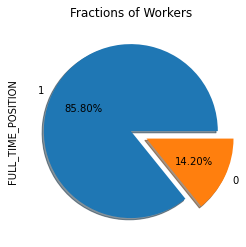

In [52]:
# To analyse the fraction of full-time and part-time workers
h1b['FULL_TIME_POSITION'].value_counts().plot(kind="pie",explode=[0, 0.2],autopct="%.2f%%",shadow=True)
plt.title("Fractions of Workers")
plt.show()